# Lesson 9  - Naive Bayes Assignment
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

## Instructions
As part of this assignment, try leveraging Naïve Bayes as a model for your independent project. As part of the modeling process, you might need to convert the data into categorical form to apply Naïve Bayes.

As a hint, if you have numerical attributes, use binning to convert them to categorical.

1. Leverage Naïve Bayes algorithm to classify build a model using the data from previous milestones.
2. Briefly summarize your findings on using Naïve Bayes.
3. Is Naïve Bayes more accurate than the regression model you used in Milestone 3?

## Declare Functions used in this assignment

In [28]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.naive_bayes
import sklearn.metrics

import warnings
warnings.filterwarnings("ignore") # To suppress warning

%matplotlib inline

In [68]:
def confusion_matrix(labels, predicted_labels, label_classes):
    return pd.DataFrame(
        sklearn.metrics.confusion_matrix(labels, predicted_labels),
        index=[label_classes], 
        columns=label_classes)  

In [58]:
# Location of dataset
filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

forestfires_df = pd.read_csv(filename)

## Binning to convert numerical to categorical attributes
The data source I used for this milestone is from **UCI Machine Learning Repository**: **Forest Fires Data Set**. 

**URL:** https://archive.ics.uci.edu/ml/datasets/Forest+Fires which all of the features used in this model are all numeric as details shown below.

**Attribute information:**
1. ~~**X** - x-axis spatial coordinate within the Montesinho park map: 1 to 9~~ <font color=red>**Not used in the model**</font>
2. ~~**Y** - y-axis spatial coordinate within the Montesinho park map: 2 to 9~~ <font color=red>**Not used in the model**</font>
3. ~~**month** - month of the year: "jan" to "dec"~~ <font color=red>**Not used in the model**</font>
4. ~~**day** - day of the week: "mon" to "sun"~~ <font color=red>**Not used in the model**</font>
5. **FFMC** - FFMC index from the FWI system: 18.7 to 96.20 <font color=blue>**(feature)**</font>
6. **DMC** - DMC index from the FWI system: 1.1 to 291.3 <font color=blue>**(feature)**</font>
7. **DC** - DC index from the FWI system: 7.9 to 860.6 <font color=blue>**(feature)**</font>
8. **ISI** - ISI index from the FWI system: 0.0 to 56.10 <font color=blue>**(feature)**</font>
9. **temp** - temperature in Celsius degrees: 2.2 to 33.30 <font color=blue>**(feature)**</font>
10. **RH** - relative humidity in %: 15.0 to 100 <font color=blue>**(feature)**</font>
11. **wind** - wind speed in km/h: 0.40 to 9.40 <font color=blue>**(feature)**</font>
12. **rain** - outside rain in mm/m2 : 0.0 to 6.4 <font color=blue>**(feature)**</font>
13. **area** - the burned area of the forest (in ha): 0.00 to 1090.84 <font color=green>**(label)**</font>

In order to leverage **Naïve Bayes algorithm** on this classification model, I need to convert those numeric attributes to categorical attributes. On this assignment, I'm particularly interested to see how these **Fire Weather index(FWI)** and other meteorological data doing for prediction. 

Below is the **Hazard Rating** 

| Hazard<br>Rating | FFMC<br>(Fine Fuel Moisture Code)  | DMC<br>(Duff Moisture Code) | DC<br>(Drought Code) | ISI<br>(Initial Spread Index) |
| --- | --- | --- | --- | --- |
| Low | 0-76 | 0-21 | 0-79 | 0-1.5|
| Moderate | 77-84 | 22-27 | 80-189 | 2-4 |
| High | 85-88 | 28-40 | 190-299 | 5-8 |
| Very High | 89-91 | 41-60 | 300-424 | 9-15 |
| Extreme | 92+ | 61+ | 425+ | 16+ |

<i>Source: https://wildfire.alberta.ca/wildfire-status/fire-weather/understanding-fire-weather.aspx</i>

I will bin those **Fire Weather index(FWI)** into its own **Hazard Rating**.

For **area**, as we can see from the following **Histogram** that majority of the burned area of forest fires are very skewed toward zero. The next bar after zero is about **50** which we can see some significant on it.

Therefore, on this assignment, I will binning the numerica area in two categories:
1. **area $<$ 50**
2. **area $\geq$ 50** 

Text(0,0.5,'Area (in Hectare)')

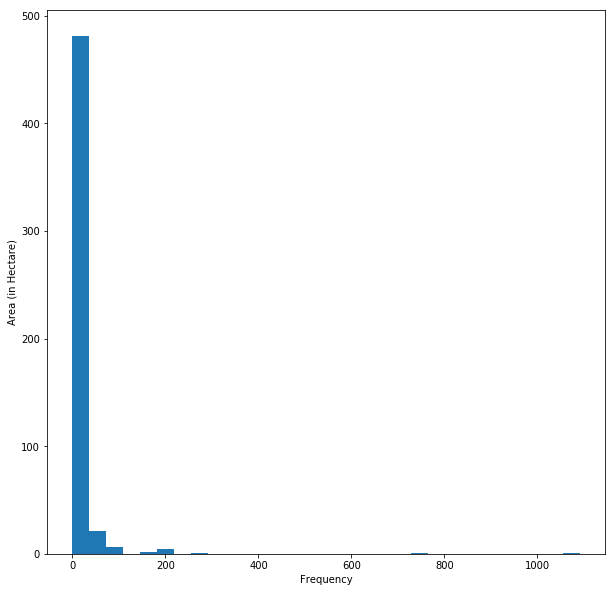

In [39]:
plt.figure(figsize=(10,10))
plt.hist(forestfires_df['area'], bins = 30)
plt.xlabel('Frequency')
plt.ylabel('Area (in Hectare)')

In [59]:
# Convert Numeric columns to Categorical columns
forestfires_df.loc[forestfires_df.loc[:, "FFMC"] < 77, "hz_rating_FFMC"] = "Low"
forestfires_df.loc[(forestfires_df.loc[:, "FFMC"] >= 77) & (forestfires_df.loc[:, "FFMC"] < 85), "hz_rating_FFMC"] = "Moderate"
forestfires_df.loc[(forestfires_df.loc[:, "FFMC"] >= 85) & (forestfires_df.loc[:, "FFMC"] < 89), "hz_rating_FFMC"] = "High"
forestfires_df.loc[(forestfires_df.loc[:, "FFMC"] >= 89) & (forestfires_df.loc[:, "FFMC"] < 92), "hz_rating_FFMC"] = "VeryHigh"
forestfires_df.loc[forestfires_df.loc[:, "FFMC"] >= 92, "hz_rating_FFMC"] = "Extreme"

forestfires_df.loc[forestfires_df.loc[:, "DMC"] < 22, "hz_rating_DMC"] = "Low"
forestfires_df.loc[(forestfires_df.loc[:, "DMC"] >= 22) & (forestfires_df.loc[:, "DMC"] < 28), "hz_rating_DMC"] = "Moderate"
forestfires_df.loc[(forestfires_df.loc[:, "DMC"] >= 28) & (forestfires_df.loc[:, "DMC"] < 41), "hz_rating_DMC"] = "High"
forestfires_df.loc[(forestfires_df.loc[:, "DMC"] >= 41) & (forestfires_df.loc[:, "DMC"] < 61), "hz_rating_DMC"] = "VeryHigh"
forestfires_df.loc[forestfires_df.loc[:, "DMC"] >= 61, "hz_rating_DMC"] = "Extreme"

forestfires_df.loc[forestfires_df.loc[:, "DC"] < 80, "hz_rating_DC"] = "Low"
forestfires_df.loc[(forestfires_df.loc[:, "DC"] >= 80) & (forestfires_df.loc[:, "DC"] < 190), "hz_rating_DC"] = "Moderate"
forestfires_df.loc[(forestfires_df.loc[:, "DC"] >= 190) & (forestfires_df.loc[:, "DC"] < 300), "hz_rating_DC"] = "High"
forestfires_df.loc[(forestfires_df.loc[:, "DC"] >= 300) & (forestfires_df.loc[:, "DC"] < 425), "hz_rating_DC"] = "VeryHigh"
forestfires_df.loc[forestfires_df.loc[:, "DC"] >= 425, "hz_rating_DC"] = "Extreme"

forestfires_df.loc[forestfires_df.loc[:, "ISI"] < 2, "hz_rating_ISI"] = "Low"
forestfires_df.loc[(forestfires_df.loc[:, "ISI"] >= 2) & (forestfires_df.loc[:, "ISI"] < 5), "hz_rating_ISI"] = "Moderate"
forestfires_df.loc[(forestfires_df.loc[:, "ISI"] >= 5) & (forestfires_df.loc[:, "ISI"] < 9), "hz_rating_ISI"] = "High"
forestfires_df.loc[(forestfires_df.loc[:, "ISI"] >= 9) & (forestfires_df.loc[:, "ISI"] < 16), "hz_rating_ISI"] = "VeryHigh"
forestfires_df.loc[forestfires_df.loc[:, "ISI"] >= 16, "hz_rating_ISI"] = "Extreme"

forestfires_df.loc[forestfires_df.loc[:, "area"] < 50, "area_range"] = "<50"
forestfires_df.loc[forestfires_df.loc[:, "area"] >= 50, "area_range"] = ">=50"

In [60]:
# Drop unused columns
Obsolete = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'area'], 
for x in Obsolete:
    forestfires_df = forestfires_df.drop(x, axis=1)
    
# Preview the data
forestfires_df.head()

,temp,RH,wind,rain,hz_rating_FFMC,hz_rating_DMC,hz_rating_DC,hz_rating_ISI,area_range
0,8.2,51,6.7,0.0,High,Moderate,Moderate,High,<50
1,18.0,33,0.9,0.0,VeryHigh,High,Extreme,High,<50
2,14.6,33,1.3,0.0,VeryHigh,VeryHigh,Extreme,High,<50
3,8.3,97,4.0,0.2,VeryHigh,High,Low,VeryHigh,<50
4,11.4,99,1.8,0.0,VeryHigh,VeryHigh,Moderate,VeryHigh,<50


### Train and Test the Model

I decide to use **Laplace Smoothing** since is an effective way to deal with data sets which do not have sufficient samples to compute probabilities. This data set has only **517 records**.

In [86]:
# Convert our dataframe columns from string (object) to "category"
for c in forestfires_df.columns:
    if forestfires_df[c].dtype == 'object':
        forestfires_df[c] = forestfires_df[c].astype('category')

# Our label column
area_range_label_col = 'area_range'
area_range_labels = forestfires_df[area_range_label_col].cat.codes

print(forestfires_df.dtypes)
forestfires_df.head()

# Convert our categorical values to numeric feature vectors
features = []
for c in forestfires_df.columns:
    if c != area_range_label_col:
        if str(forestfires_df[c].dtype) == 'category': # converts categorical columns to numeric values
            features.append(forestfires_df[c].cat.codes)
        else:
           features.append(forestfires_df[c])
area_feature_vecs = np.array(features).T
area_feature_vecs

temp               float64
RH                   int64
wind               float64
rain               float64
hz_rating_FFMC    category
hz_rating_DMC     category
hz_rating_DC      category
hz_rating_ISI     category
area_range        category
dtype: object


array([[ 8.2, 51. ,  6.7, ...,  3. ,  3. ,  1. ],
       [18. , 33. ,  0.9, ...,  1. ,  0. ,  1. ],
       [14.6, 33. ,  1.3, ...,  4. ,  0. ,  1. ],
       ...,
       [21.2, 70. ,  6.7, ...,  4. ,  0. ,  2. ],
       [25.6, 42. ,  4. , ...,  0. ,  0. ,  4. ],
       [11.8, 31. ,  4.5, ...,  2. ,  3. ,  2. ]])

In [85]:
# Let check the area's category code
# 0 is area <50
# 1 is area >= 50
print(list(zip("0", forestfires_df.loc[forestfires_df[area_range_label_col].cat.codes == 0, "area_range"][:1])))
print(list(zip("1", forestfires_df.loc[forestfires_df[area_range_label_col].cat.codes == 1, "area_range"][:1])))

[('0', '<50')]
[('1', '>=50')]


In [63]:
# Create the Model
model = sklearn.naive_bayes.MultinomialNB(alpha=3)
model.fit(area_feature_vecs, area_range_labels)

MultinomialNB(alpha=3, class_prior=None, fit_prior=True)

In [65]:
# Look at the log conditional probabilities of being <50 (0) or >=50 (1) on each of these features
conditional_probas = pd.DataFrame(model.feature_log_prob_, columns=forestfires_df.columns[:-1])
conditional_probas

,temp,RH,wind,rain,hz_rating_FFMC,hz_rating_DMC,hz_rating_DC,hz_rating_ISI
0,-1.356400,-0.491589,-2.894598,-7.835234,-3.633067,-4.692418,-4.720155,-3.489053
1,-1.172757,-0.584017,-2.859461,-6.336590,-3.523179,-5.037307,-5.355760,-3.409850


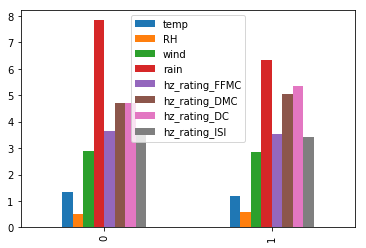

In [66]:
(-conditional_probas).plot(kind='bar')

### Evaluate Model Performance

In [69]:
# Get the preidctions & probabilities results from the model
predicted_area_range = model.predict(area_feature_vecs)
area_range_probabilities = model.predict_proba(area_feature_vecs)

# Compute Accuracy, Precision, Recall and Confusion Matrix
accuracy = sklearn.metrics.accuracy_score(area_range_labels, predicted_area_range)
precision = sklearn.metrics.precision_score(area_range_labels, predicted_area_range)
recall = sklearn.metrics.recall_score(area_range_labels, predicted_area_range)
print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy, precision, recall))
print('Confusion matrix:')
confusion_matrix(area_range_labels, predicted_area_range, 
                 forestfires_df[area_range_label_col].cat.categories)

Accuracy = 0.917, Precision = 0.087, Recall = 0.083
Confusion matrix:


,<50,>=50
<50,472,21
>=50,22,2


### Summary

1. From **Confusion Matrix**: 
    - **True Positive = 2 (lower right)** and **True Negative = 472 (upper left)**
    - **False Negative (Type II error) = 22 (lower left)** and **False Positive (Type I error) = 21 (upper right)** 
    - **Note:** result varies on each run.
2. **Accuracy** We predict 9.17 out of 10 times correct. This is good sign.
3. **Precision** Since precision refers to the closeness of the measurements to each other, this mean each prediction will yeild the same result about +87% which is really good.
4. **Recall** for both class 0 (**area $<$ 50**) and class 1 (**area $\geq$ 50**) are pretty good which mean we have the useful proportion of both cases about +83% amoung the overall data.

###  Is Naïve Bayes more accurate than the regression model you used in Milestone 3

From the **Accuracy**, **Precision** and **Recall**, I can conclude that this model is <font color=green>**more accurate**</font> than the regression model I created in **Milestone 3**.

However, from the **Confusion matrix**, the **True Positive** and **False Negative** are pretty low compared with the rest. I can conclude that this model is pretty good to predict if the actual burned area is lower than 50 (**area $<$ 50**) but not very accurate when the actual burned area is greater than or equal to 50 (**area $\geq$ 50**).